# Índice de Felicidad - Series de tiempo

Maestría Ciencias de Información y las Comunicaciones - Materia: Big Data.

Por: David Alonso Rueda Rodríguez - 20181395007 (daruedar@correo.udistrital.edu.co)

Tema: Preprocesamiento de datos.

#### Objetivo de la actividad:

Aprender conceptos básicos de series de tiempo

#### Temas trabajados

A continuación, listado de actividades trabajadas en el pre-procesamiento de datos:
    
##### Pre-procesamiento
    1  Cargar Librerías
    2. Importar datos con pandas
    3. Revisión de datos cargados
    4. Datos a analizar
    
#### Listado de versiones

1.0.0 Preparación del documento siguiendo documento de referencia.

#### Fuente de repositorio de datos:

Los datos trabajados se descargaron desde la plataforma Datos Macro, repositorio Titanic.

Link: https://datosmacro.expansion.com/demografia/indice-felicidad

### 1. Cargar librerías

In [234]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## 2. Importar achivo de interés

In [235]:
# Cargar archivo de datos
# para cargar estos datos es necesario tener instalada la libreria xlrd
ai = pd.read_excel('../src/DatosFelicidad.xlsx')
ai.head(5)

,Países,RF_2019,IF2019,RF_2018,IF2018,RF_2016,IF2016,RF_2015,IF2015,RF_2014,IF2014
0,Finlandia,1,7769,1.0,7632.0,5.0,7469.0,5.0,7413.0,7.0,7389.0
1,Dinamarca,2,7600,3.0,7555.0,2.0,7522.0,1.0,7526.0,1.0,7693.0
2,Noruega,3,7554,2.0,7594.0,1.0,7537.0,4.0,7498.0,2.0,7655.0
3,Islandia,4,7494,4.0,7495.0,3.0,7504.0,3.0,7501.0,9.0,7355.0
4,Holanda,5,7488,6.0,7441.0,6.0,7377.0,7.0,7339.0,4.0,7512.0


## 3. Revisión de Datos Cargados

In [236]:
#¿Cuántos registros fueron cargados?
print('\n**¿Cuántos registros fueron cargados?**\n')
print('- Número de Registros Cargados {} \n- Número de Columnas: {}' .format(ai.shape[0], ai.shape[1]))


**¿Cuántos registros fueron cargados?**

- Número de Registros Cargados 154 
- Número de Columnas: 11


In [237]:
# ¿Cuántos datos nulos tiene el listado de datos?
print('\n**¿Cuántos datos nulos tiene el listado de datos?**\n')
ai.isnull().sum()


**¿Cuántos datos nulos tiene el listado de datos?**



Países     0
RF_2019    0
IF2019     0
RF_2018    3
IF2018     3
RF_2016    4
IF2016     4
RF_2015    5
IF2015     5
RF_2014    7
IF2014     7
dtype: int64

¿Qué datos contiene cada una de las columnas?

|Nombre de la Columna|Nombre Original|Descripción del Contenido|
|:-----|:-----|:-----|
|RF_2019|Ranking de Felicidad|Posición en el ranking para el año de estudio 2019.|
|IF2019|Índice de Felicidad|Puntaje acumulado para el año de estudio 2019.|
|RF_2018|Ranking de Felicidad|Posición en el ranking para el año de estudio 2018|
|IF2018|Índice de Felicidad|Puntaje acumulado para el año de estudio 2018|
|RF_2016|Ranking de Felicidad|Posición en el ranking para el año de estudio 2016|
|IF2016|Índice de Felicidad|Puntaje acumulado para el año de estudio 2016|
|RF_2015|Ranking de Felicidad|Posición en el ranking para el año de estudio 2015|
|IF2015|Índice de Felicidad|Puntaje acumulado para el año de estudio 2015|
|RF_2014|Ranking de Felicidad|Posición en el ranking para el año de estudio 2014|
|IF2014|Índice de Felicidad|Puntaje acumulado para el año de estudio 2014|

Se han identificado datos nulos para datos en los años 2018, 2016, 2015 y 2014, los países que presenta valores nulos son los siguientes:

|Países con datos Nulos 2018|Países con datos Nulos 2016|Países con datos Nulos 2015|Países con datos Nulos 2014|
|--|--|--|--|
|Gambia|Gambia|Gambia|Gambia|
|Suazilandia|Suazilandia|Suazilandia|
|Comoras|Comoras|||
||Laos|||
|||Mozambique||
|||República Centroafricana||
||||Bután|
||||Costa de Marfil|
||||Somalia|
||||Namibia|
||||República Democrática del Congo|
||||Sudán del Sur|
    

In [238]:
# Revisión de datos cargados
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 11 columns):
Países     154 non-null object
RF_2019    154 non-null int64
IF2019     154 non-null int64
RF_2018    151 non-null float64
IF2018     151 non-null float64
RF_2016    150 non-null float64
IF2016     150 non-null float64
RF_2015    149 non-null float64
IF2015     149 non-null float64
RF_2014    147 non-null float64
IF2014     147 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.3+ KB


En una primera revisión los datos de las columnas con prefijo RF, fueron cargados como objetos. La modificación realizada consistió en cambiar el separador de miles para ajustar el formato regional de separación de decimales

#### Transformación de tabla original
Considerando que los datos en general representan la misma variable y esta cambia únicamente en los años se ha transformado la tabla original desde la fuente de datos.

El resultado es una tabla con 4 variables:

|Variable|Descripción de contenido|
|:--|:--|
|Paises| Nombre del país|
|anio| Año del dato|
|RF| Ranking de Felicidad|
|IF| Índice de Felicidad|

Luego de las transformación propuestas se ha pasado de una tabla con 10 columnas y 154 datos a una tabla con
4 columnas y 751 datos.

In [239]:
ai2 = pd.read_excel('../src/DatosFelicidad2.xlsx')
ai2.head(5)

,Paises,anio,RF,IF
0,Finlandia,2019,1,7769
1,Dinamarca,2019,2,7600
2,Noruega,2019,3,7554
3,Islandia,2019,4,7494
4,Holanda,2019,5,7488


In [240]:
#¿Cuántos registros fueron cargados?
print('\n**¿Cuántos registros fueron cargados?**\n')
print('- Número de Registros Cargados {} \n- Número de Columnas: {}' .format(ai2.shape[0], ai2.shape[1]))


**¿Cuántos registros fueron cargados?**

- Número de Registros Cargados 751 
- Número de Columnas: 4


Otros de los elementos modificados en esta versión fueron los datos nulos que aparecian en la primera tabla de datos, de tal forma que estos datos fueron eliminados desde el archivo fuente

In [241]:
# ¿Cuántos datos nulos tiene el listado de datos?
print('\n**¿Cuántos datos nulos tiene el listado de datos?**\n')
ai2.isnull().sum()


**¿Cuántos datos nulos tiene el listado de datos?**



Paises    0
anio      0
RF        0
IF        0
dtype: int64

In [242]:
# Descripción de los datos
ai2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 4 columns):
Paises    751 non-null object
anio      751 non-null int64
RF        751 non-null int64
IF        751 non-null int64
dtypes: int64(3), object(1)
memory usage: 23.5+ KB


## 4. Datos a Analizar

En primera instancia se ha realizado una revisión global de las variables

In [243]:
ai.describe()

,RF_2019,IF2019,RF_2018,IF2018,RF_2016,IF2016,RF_2015,IF2015,RF_2014,IF2014
count,154.000000,154.000000,151.000000,151.000000,150.000000,150.00000,149.000000,149.000000,147.000000,147.000000
mean,78.805195,5400.577922,78.105960,5385.761589,77.540000,5365.96000,79.100671,5379.228188,78.326531,5424.557823
std,45.379601,1118.668780,45.271794,1124.241159,45.069466,1136.83544,45.674634,1148.940841,45.784810,1118.542686
min,1.000000,2853.000000,1.000000,2905.000000,1.000000,2693.00000,1.000000,2905.000000,1.000000,2936.000000
25%,39.250000,4537.500000,38.500000,4463.500000,38.250000,4519.25000,39.000000,4404.000000,38.500000,4567.500000
50%,79.500000,5356.000000,79.000000,5358.000000,78.000000,5283.00000,80.000000,5303.000000,78.000000,5340.000000
75%,117.750000,6189.500000,116.500000,6182.500000,115.750000,6152.25000,118.000000,6324.000000,118.500000,6306.000000
max,156.000000,7769.000000,156.000000,7632.000000,155.000000,7537.00000,157.000000,7526.000000,156.000000,7693.000000


En el primer caso es posible analizar los datos por cada año, y una vez realizada esta actividad hacer una comparación entre los años disponibles.

##### Media

Se han tomado los datos del Índice de Felicidad, en este grupo se destaca que la media para todos los países considerados ha estado en todos los casos sobre 5379.22 puntos, este valor que es el más de los años comparados se presentó en el año 2015, y el valor más alto de esta medida de tendencia central se ha presentado para el año 2014.

#### Valor mínimo

El menor valor logrado en el índice de felicidad se presentó en el año 2016, y el mayor valor de los menores fue obtenido en el 2905.

#### Valor máximo

El menor valor máximo fue obtenido en 2016, mientras el máximo valor de este valor se obtuvo en 2019.

Los anteriores datos no muestran una tendencia clara de los indicadores globales año tras año, inicialmente se esperaba que estos valores presentaran una tendencia a nivel global, pero este comportamiento no se evidencia.

#### Dispersión de los datos

Los datos presentan una dispersión que en promedio rondan las 1129, al promediar este valor con los obtenidos en los años con datos la dispersión tampoco presenta un comportamiento estable, porque frente al promedio pasa de un valor de -10 en el 2014, y salta abruptamente a 19 en el años 2015, para el año 2016 la diferencia son 7 unidades mientras para los años 2018 es -5 y para el año 2019 de -10. En conclusión no se observa una tendencia.

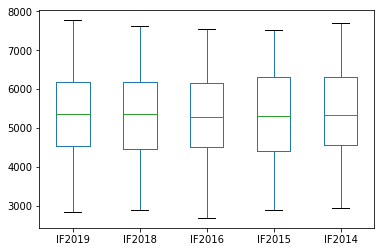

In [269]:
plot1 = ai.boxplot(['IF2019', 'IF2018', 'IF2016', 'IF2015', 'IF2014'], grid= False)

Se ha generado un gráfico de cajas para revisar si se presentan valores que se consideren atípicos, en este caso no se han marcado valores que salgan de los valores intercuartílicos definidos en estos conjuntos de datos.

In [246]:
# Definición de listado con datos de interés
paises_Interes = ['Finlandia', 'Dinamarca', 'Canadá', 'Australia', 'Estados Unidos', 'España', 'Colombia']

In [284]:
# Declaración e inicialización de DataFrame df
df = pd.DataFrame()
# Extracción de datos de interés
for i in paises_Interes:
    df = df.append(ai[ai.Países == i], ignore_index= True)
df[['Países', 'IF2019', 'IF2018', 'IF2016', 'IF2015', 'IF2014']]

,Países,IF2019,IF2018,IF2016,IF2015,IF2014
0,Finlandia,7769,7632.0,7469.0,7413.0,7389.0
1,Dinamarca,7600,7555.0,7522.0,7526.0,7693.0
2,Canadá,7278,7328.0,7316.0,7404.0,7477.0
3,Australia,7228,7272.0,7284.0,7313.0,7350.0
4,Estados Unidos,6892,6886.0,6993.0,7104.0,7082.0
5,España,6354,6310.0,6403.0,6361.0,6322.0
6,Colombia,6125,6260.0,6357.0,6481.0,6416.0


In [280]:
# Comparación con los valores mundiales de los países de interés
ai[['IF2019', 'IF2018', 'IF2016', 'IF2015', 'IF2014']].describe()

,IF2019,IF2018,IF2016,IF2015,IF2014
count,154.000000,151.000000,150.00000,149.000000,147.000000
mean,5400.577922,5385.761589,5365.96000,5379.228188,5424.557823
std,1118.668780,1124.241159,1136.83544,1148.940841,1118.542686
min,2853.000000,2905.000000,2693.00000,2905.000000,2936.000000
25%,4537.500000,4463.500000,4519.25000,4404.000000,4567.500000
50%,5356.000000,5358.000000,5283.00000,5303.000000,5340.000000
75%,6189.500000,6182.500000,6152.25000,6324.000000,6306.000000
max,7769.000000,7632.000000,7537.00000,7526.000000,7693.000000


En esta comparación se observará el caso especifico de Colombia

En todos los años el índide de felicidad obtenido por el país ha estado por debajo del 75% de los datos, evidenciandose que Colombia no es uno de los países más felices del mundo.

Evidentemente está por encima de la media en todos los casos, pero al estar al interior del rango intercuartílico el país tiene un comportamiento normal.